In [2]:
import os
import sys
import pandas as pd

In [3]:
# Add path to system and import LOCAL_DATA_PATH from params.py
sys.path.append('/Users/thorsten/code/ThorstenCodes/MorphoMind/')
from data_handling.params import LOCAL_DATA_PATH
# Change plate number here if you change the plate!!!
platenr = '24277'
# sets the path to where the files are located/ the csv file from Pepe maybe needs to be transferred there
folder_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/pictures/')

In [4]:
#Load the two .csv files. Annotated is safed with excel and therefore needs seperator ;
plate_info = pd.read_csv(f'{folder_path}/24277_small.csv')
annotation = pd.read_csv(f'{folder_path}/annotation_label.csv', sep=';')

In [5]:
plate_info.head()

,PhGolgi,Hoechst,ERSyto,Mito,ERSytoBleed,CellCount,Well,PhotoNumber,Role,MMoles,Plate,MeanArea
0,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,91,a01,1,treated,3.022516,24277,2656.054945
1,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,89,a01,2,treated,3.022516,24277,2800.662921
2,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,59,a01,3,treated,3.022516,24277,4364.169492
3,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,74,a01,4,treated,3.022516,24277,3410.445946
4,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,87,a01,5,treated,3.022516,24277,3082.609195


In [6]:
annotation.head()

,Well ID,Image Number,Dead Cells,Label
0,a06,1,5,drug_effective
1,a06,2,3,drug_effective
2,a06,3,6,drug_effective
3,a06,4,0,drug_effective
4,a06,5,0,drug_effective


In [7]:
#Create a unique identifier to merge them
annotation['Unique_ID'] = annotation['Well ID'].astype(str) + '_' + annotation['Image Number'].astype(str)
plate_info['Unique_ID'] = plate_info['Well'].astype(str) + '_' + plate_info['PhotoNumber'].astype(str)

In [8]:
#Merge the tables and only the Dead Cells and Label column of annotation
annotation_columns = annotation[['Dead Cells', 'Label', 'Unique_ID']]
plate_annotated = pd.merge(plate_info, annotation_columns, how='left', on='Unique_ID', )
plate_annotated

,PhGolgi,Hoechst,ERSyto,Mito,ERSytoBleed,CellCount,Well,PhotoNumber,Role,MMoles,Plate,MeanArea,Unique_ID,Dead Cells,Label
0,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,91,a01,1,treated,3.022516,24277,2656.054945,a01_1,5.0,healthy
1,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,89,a01,2,treated,3.022516,24277,2800.662921,a01_2,5.0,healthy
2,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,59,a01,3,treated,3.022516,24277,4364.169492,a01_3,5.0,healthy
3,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,74,a01,4,treated,3.022516,24277,3410.445946,a01_4,1.0,stressed
4,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,87,a01,5,treated,3.022516,24277,3082.609195,a01_5,0.0,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,56,p24,2,treated,5.000000,24277,3810.660714,p24_2,NaN,NaN
2293,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,121,p24,3,treated,5.000000,24277,2295.983471,p24_3,NaN,NaN
2294,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,59,p24,4,treated,5.000000,24277,4217.067797,p24_4,NaN,NaN
2295,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,68,p24,5,treated,5.000000,24277,3967.897059,p24_5,NaN,NaN


In [9]:
from data_handling.params import LOCAL_DATA_PATH
filename = os.path.join(LOCAL_DATA_PATH, f"{platenr}/raw/pictures/{platenr}_annotated.csv")
plate_annotated.to_csv(filename, index=False)
print(f"DataFrame saved to {filename}")

DataFrame saved to /Users/thorsten/.morpho_minds_data/24277/raw/pictures/24277_annotated.csv


In [10]:
plate_annotated["PhGolgi"][0]

'https://storage.cloud.google.com/cell_profiles_morpho_minds/24277/raw/pictures/24277-Ph_golgi/cdp2bioactives_a01_s1_w4f0fa59df-2025-4b28-b6f1-a41391e7d227.tif'

In [11]:
from PIL import Image
import numpy as np
import requests
from io import BytesIO

image_url = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/pictures/{platenr}-Ph_golgi/cdp2bioactives_a03_s1_w45063dcc7-2747-4a41-889c-bd892ea60573.tif')

# Download the image
# response = requests.get(image_url)
# image_data = BytesIO(response.content)
image = Image.open(image_url)

# Convert the image to a NumPy array
image_np = np.array(image)

# Assuming the image is grayscale (1 channel), if it's not, you may need to select a specific channel
# For a 3-channel image, you'd select one channel like: image_np_channel = image_np[:, :, channel_index]

print("Shape of the loaded image channel:", image_np.shape)

Shape of the loaded image channel: (520, 696)


In [12]:
channel = 'PhGolgi'
paths = plate_annotated[channel].tolist()
paths

['https://storage.cloud.google.com/cell_profiles_morpho_minds/24277/raw/pictures/24277-Ph_golgi/cdp2bioactives_a01_s1_w4f0fa59df-2025-4b28-b6f1-a41391e7d227.tif',
 'https://storage.cloud.google.com/cell_profiles_morpho_minds/24277/raw/pictures/24277-Ph_golgi/cdp2bioactives_a01_s2_w44bf0ab1d-a7a1-422b-b0fb-d66e4d40d14d.tif',
 'https://storage.cloud.google.com/cell_profiles_morpho_minds/24277/raw/pictures/24277-Ph_golgi/cdp2bioactives_a01_s3_w49abe4e30-4eed-4128-af91-2be27601bf9c.tif',
 'https://storage.cloud.google.com/cell_profiles_morpho_minds/24277/raw/pictures/24277-Ph_golgi/cdp2bioactives_a01_s4_w41acd7309-157d-41a2-bb8c-fb386c894cc7.tif',
 'https://storage.cloud.google.com/cell_profiles_morpho_minds/24277/raw/pictures/24277-Ph_golgi/cdp2bioactives_a01_s5_w4b254a0b2-f029-4b98-a7d2-4813288ad804.tif',
 'https://storage.cloud.google.com/cell_profiles_morpho_minds/24277/raw/pictures/24277-Ph_golgi/cdp2bioactives_a01_s6_w4b328e14f-5559-4b26-b93e-60c720a42c90.tif',
 'https://storage.clou

In [13]:
from PIL import Image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from pathlib import Path


channel = 'PhGolgi'
# Assuming `df` is your DataFrame and it has columns like 'Ph-golgi', 'Hoechst', etc.
local_dir = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/pictures/{platenr}-{channel}/')
image_paths = plate_annotated['PhGolgi'].map(lambda x: str(Path(LOCAL_DATA_PATH).joinpath(platenr, 'raw', 'pictures', f'{platenr}-Ph_golgi', x.split('/')[-1])))
image_paths
# Initialize dictionaries to hold file paths and preprocessed images
channel_image_files = {channel : []}
channel_images_pre = {channel : []}

    # Iterate through each path, load, and preprocess the image
for path in image_paths:
    # Append file path
    channel_image_files[channel].append(path)

    # Load, resize, and convert image to array
    img = load_img(path, target_size=(224, 224), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Convert the grayscale image to RGB by duplicating the single channel three times
    img_array_rgb = np.repeat(img_array_expanded, 3, axis=-1)

    # Append the preprocessed RGB image
    channel_images_pre[channel].append(img_array_rgb)


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def build_feature_extractor(img_width=224, img_height=224, pretrained_model='MobileNetV2'):
    ''' This functions loads the top-layer of the model and extracts its preprocessing and applies it to the images'''
    # Correctly initialize models and preprocessing functions
    models = {'MobileNetV2': tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(img_height, img_width, 3))}
    preprocess = {'MobileNetV2': keras.applications.mobilenet_v2.preprocess_input}

    feature_extractor = models[pretrained_model]
    preprocess_input = preprocess[pretrained_model]

    inputs = keras.Input((img_height, img_width, 3))
    preprocessed = preprocess_input(inputs)
    outputs = feature_extractor(preprocessed)

    return keras.Model(inputs, outputs, name="feature_extractor")

In [15]:
# Instantiate the feature extractor model
channel_feat = {}
feature_extractor_model = build_feature_extractor()
# for channel in channels:
#     for i in range(len(channel_images[channel])):
#         features = feature_extractor_model.predict(channel_images[channel][i])
#         channel_feat[channel] = features
# channel_feat

# Prepare the images in a single batch for the channel
images_batch = np.vstack(channel_images_pre[channel])
# Preprocess the images batch
images_batch_preprocessed = preprocess_input(images_batch)
# Extract features in a single call
features = feature_extractor_model.predict(images_batch_preprocessed)
channel_feat[channel] = features

channel_feat

72/72 [==============================] - 15s 204ms/step


{'PhGolgi': array([[0.98431724, 0.        , 0.593344  , ..., 0.        , 0.02866475,
         1.0915935 ],
        [1.0651683 , 0.        , 0.22089471, ..., 0.        , 0.0181651 ,
         0.535045  ],
        [0.86441416, 0.        , 0.40099895, ..., 0.        , 0.        ,
         0.18434551],
        ...,
        [0.42674622, 0.        , 0.13461387, ..., 0.        , 0.04275125,
         0.9797936 ],
        [0.8290353 , 0.01223873, 0.01889722, ..., 0.        , 0.00754863,
         0.3005947 ],
        [0.05682898, 0.        , 0.49025038, ..., 0.        , 0.        ,
         1.4326854 ]], dtype=float32)}

In [28]:
X_pred_impute = channel_feat['PhGolgi']
y_pred_impute = plate_annotated['Dead Cells'].dropna()
X_pred_impute.shape, y_pred_impute.shape

((2297, 1280), (206,))

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_pred_impute, y_pred_impute, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 5: Make predictions on your data
predictions = model.predict(X_test)

# Step 6: Impute these predictions into the CSV file
plate_annotated.loc[X_test.index, 'Predicted Dead Cells'] = predictions

# Save the updated dataframe to CSV
filename2 = os.path.join(LOCAL_DATA_PATH, f"{platenr}/raw/pictures/{platenr}_annotated_with_predictions.csv")
plate_annotated.to_csv(filename2, index=False)

ValueError: Input y contains NaN.

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from pathlib import Path


channel = 'PhGolgi'
# Assuming `df` is your DataFrame and it has columns like 'Ph-golgi', 'Hoechst', etc.
local_dir = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/pictures/{platenr}-{channel}/')
image_paths = plate_annotated['PhGolgi'].map(lambda x: str(Path(LOCAL_DATA_PATH).joinpath(platenr, 'raw', 'pictures', f'{platenr}-Ph_golgi', x.split('/')[-1])))
image_paths
# Initialize dictionaries to hold file paths and preprocessed images
channel_image_files = {channel : []}
channel_images = {channel : []}

    # Iterate through each path, load, and preprocess the image
for path in image_paths:
    # Append file path
    channel_image_files[channel].append(path)

    # Load, resize, and convert image to array
    img = load_img(path, target_size=(224, 224), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    # Convert the grayscale image to RGB by duplicating the single channel three times
    #img_array_rgb = np.repeat(img_array_expanded, 3, axis=-1)

    # Append the preprocessed RGB image
    channel_images[channel].append(img_array_expanded)


In [175]:
channel_images

{'PhGolgi': [array([[[[781.],
           [704.],
           [604.],
           ...,
           [746.],
           [761.],
           [889.]],
  
          [[695.],
           [675.],
           [564.],
           ...,
           [765.],
           [806.],
           [797.]],
  
          [[587.],
           [595.],
           [631.],
           ...,
           [824.],
           [862.],
           [910.]],
  
          ...,
  
          [[683.],
           [673.],
           [724.],
           ...,
           [720.],
           [687.],
           [753.]],
  
          [[592.],
           [623.],
           [633.],
           ...,
           [694.],
           [690.],
           [771.]],
  
          [[578.],
           [640.],
           [662.],
           ...,
           [707.],
           [719.],
           [734.]]]], dtype=float32),
  array([[[[728.],
           [852.],
           [885.],
           ...,
           [719.],
           [716.],
           [659.]],
  
          [[696.],

In [176]:
channel_images['PhGolgi'][0].shape

(1, 224, 224, 1)

In [177]:
images_batch = np.vstack(channel_images[channel])
tmp = images_batch/65536
tmp

In [178]:
y =  plate_annotated['Dead Cells']

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tmp, y, test_size=0.3, random_state=42)

In [199]:
from tensorflow.keras import models
from tensorflow.keras import layers

def model_grimreaper():
    model = models.Sequential()
    model.add(layers.Conv2D(8, kernel_size=(4,4), activation = 'relu', input_shape = (224,224,1), padding='same'))
    model.add(layers.Conv2D(16, kernel_size=(3,3), activation = 'relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(32, kernel_size=(2,2), activation = 'relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='linear'))

    print(model.summary())

    model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

    return model

In [200]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)
model = model_grimreaper()
model.fit(X_train, y_train,
          epochs=500,  # Use early stopping in practice
          batch_size=32,
          verbose=1,
          validation_split = 0.3,
          callbacks = [es])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 224, 224, 8)       136       
                                                                 
 conv2d_28 (Conv2D)          (None, 222, 222, 16)      1168      
                                                                 
 average_pooling2d_5 (Avera  (None, 111, 111, 16)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 110, 110, 32)      2080      
                                                                 
 flatten_8 (Flatten)         (None, 387200)            0         
                                                                 
 dense_8 (Dense)             (None, 32)                12390432  
                                                      

In [182]:
base_model_score = np.sum(abs(plate_annotated['Dead Cells'] - plate_annotated['Dead Cells'].mean()))/plate_annotated.shape[0]
base_model_score

0.41430523317025536

In [201]:
model.evaluate(X_test, y_test, verbose=0)

[1.2336190938949585, 0.3131047487258911]

In [186]:
layer_1.weights

[<tf.Variable 'conv2d_18/kernel:0' shape=(4, 4, 1, 4) dtype=float32, numpy=
 array([[[[-0.23237358, -0.19923134,  0.10417029, -0.14196265]],
 
         [[ 0.08451284,  0.21625228,  0.20802945,  0.04713081]],
 
         [[ 0.07058534, -0.28517097, -0.24565177,  0.22232518]],
 
         [[-0.2804862 , -0.20346239, -0.02025134, -0.21127485]]],
 
 
        [[[-0.05459548, -0.16396388,  0.02133745, -0.15378617]],
 
         [[ 0.00671917,  0.06365724, -0.24350777,  0.15415686]],
 
         [[ 0.00699385, -0.05714438, -0.24161345, -0.18427636]],
 
         [[-0.09634174, -0.14584208,  0.07199536,  0.0665733 ]]],
 
 
        [[[ 0.22366242, -0.27497894,  0.01656904, -0.12388792]],
 
         [[-0.2002595 ,  0.1525061 ,  0.24016955, -0.1250564 ]],
 
         [[-0.28352025, -0.09197718, -0.01560001,  0.17829344]],
 
         [[-0.18886785, -0.22693163,  0.20338584, -0.01842583]]],
 
 
        [[[ 0.12161673, -0.13225105, -0.10682207, -0.18052512]],
 
         [[-0.02497548,  0.25748488, -0.2317

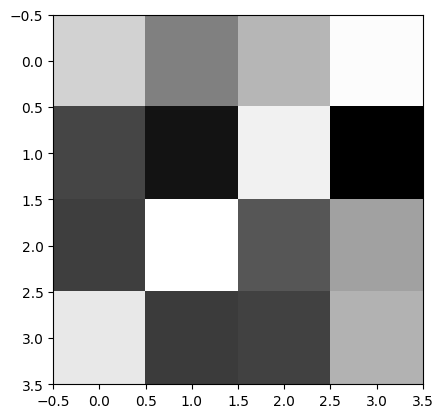

In [209]:
import matplotlib.pyplot as plt
layer_1 = model.layers[0]
plt.imshow(layer_1.weights[0][:,:,:,1], cmap='gray');

In [210]:
batch = X_train[0:40]
activation_1 = layer_1(batch)
activation_1.shape

TensorShape([40, 224, 224, 8])

In [1]:
fig, axs = plt.subplots(8, 4, figsize=(15, 10))
for i in range(8):
    for j in range(4):
        channel_index = 4*i + j
        if channel_index < 8:  # Ensure index doesn't exceed the maximum number of channels
            feature_map = activation_1[0, :, :, channel_index]
            axs[i, j].imshow(feature_map, cmap='gray')
            axs[i, j].set_title(f'Channel {channel_index}')
        else:
            axs[i, j].axis('off')  # Turn off axis for empty plots
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined